<a href="https://colab.research.google.com/github/AMEERKOTTA/hands_on_machine_learning_with_sklearn_keras_and_tensorflow/blob/main/Intro%20to%20Tensorflow%20for%20Deep%20Learning/07-Time%20Series%20Forecasting/01_common_patterns_in_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COMMON PATTERNS IN TIME SERIES**

IMPORT LIBRARIES

In [1]:
import numpy as np
import matplotlib.pyplot as plt

DEFINE FUNCTION TO PLOT TIME SERIES

In [17]:
## define the function plot_series
def plot_series(time, series, format="-", start=0, end=None, label=None):
  """Function to plot the Given Time - Series Data"""
  ## plot time from start to end [start:end]
  ## plot seres from start to end [start:end]
  plt.plot(time[start:end], series[start:end], format, label = label)
  ## define the xlabel
  plt.xlabel("Time")
  ## define the ylabel
  plt.ylabel("Value")

  if label:
    plt.legend(fontsize = 14)
  plt.grid(True)

TREND AND SEASONALITY

In [4]:
## define the function for trend.
def trend(time, slope = 0):
  """The function will return the Trend, Trend is the Multiplication of Time and Slope"""
  return (time * slope)

TIME SERIES THAT JUST TRENDS UPWARDS

[   0    1    2 ... 1458 1459 1460]
[ 10.   10.1  10.2 ... 155.8 155.9 156. ]


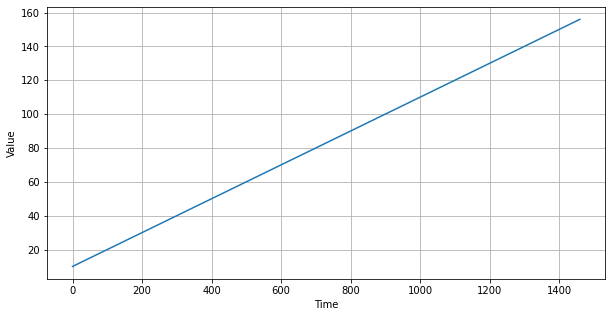

In [22]:
## define the time
time = np.arange(4 * 365 + 1)
print(time)  ## shape = (1461,)
## define the baseline.
baseline = 10
## define the series.
## sereis = baseline + a trend
series = baseline + trend(time, 0.1)  ## slope = 0.1 which is positive. trends upwards.
print(series)

## plot the series
plt.figure(figsize = (10,5))
plot_series(time, series)
plt.show()

TIME SERIES THAT JUST TRENDS DOWNWARDS

[100.   99.9  99.8 ... -45.8 -45.9 -46. ]


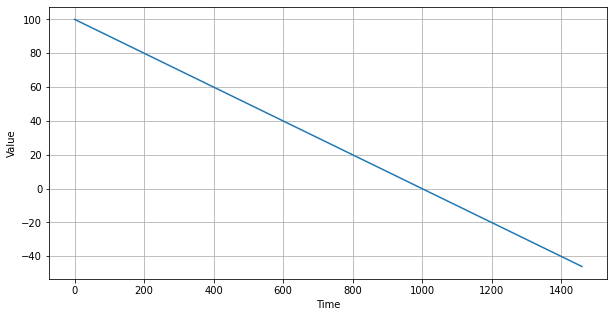

In [39]:
baseline = 100
series = baseline + trend(time , -0.1)
print(series)

## plot the series
plt.figure(figsize = (10,5))
plot_series(time,series)
plt.show();

TIME SERIES WITH SEASONAL PATTERNS

In [47]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

[   0    1    2 ... 1458 1459 1460]
[40.         39.99407357 39.97629603 ...  2.02448999  2.00791854
 40.        ]


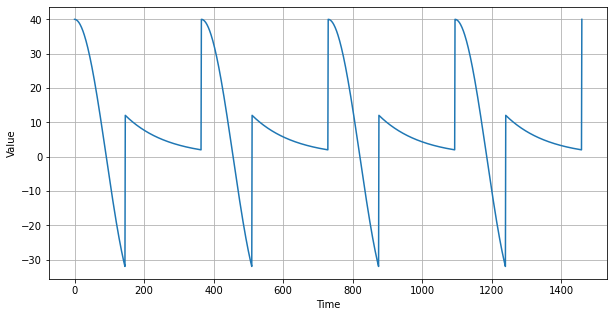

In [49]:
## define the series and plot it :- series = cosine + exponential
amplitude = 40
## using the seasonality function
print(time)
series = seasonality(time, period=365, amplitude=amplitude)
print(series)

plt.figure(figsize=(10, 5))
plot_series(time, series)
plt.show()

TIME SEREIS WITH BOTH SEASONALITY AND TREND

[ 50.          50.04407357  50.07629603 ...  84.92448999  84.95791854
 123.        ]


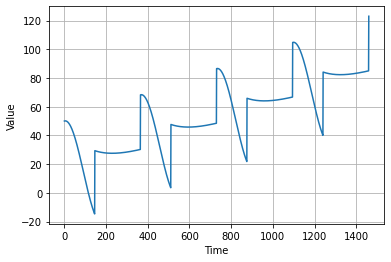

In [56]:
## for this we have to add three points.
## we need a baseline.
## we need a trend to follow - use trend function
## we need a seasonality as well.

slope = 0.05
baseline = 10
series = baseline + trend(time, slope) + seasonality(time, period = 365, amplitude = amplitude)
print(series)

## plot the figure
plt.plot(figsize = (20,10))
plot_series(time, series)
plt.show();

DEFINE THE NOISE TERM AS WELL

In [58]:
## function to define the noise
def white_noise(time, noise_level=1, seed=None):
    """Function to Define the Noise"""
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

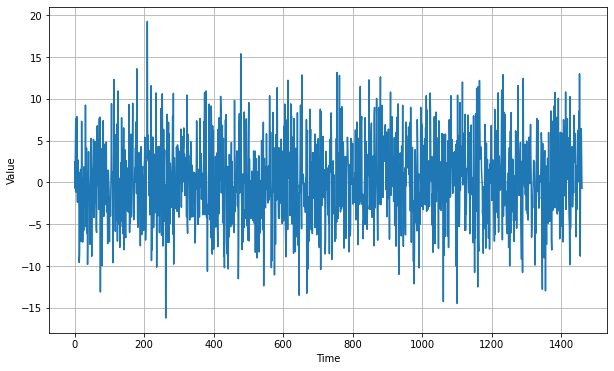

In [59]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

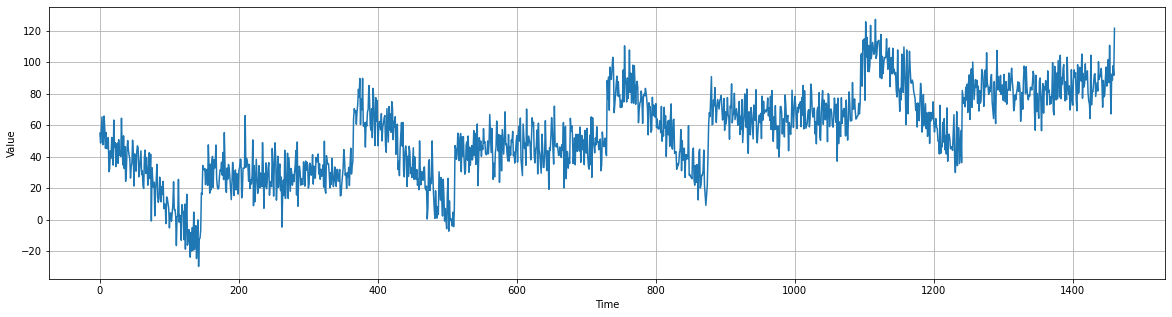

In [61]:
## add the noise to the series that we defined earlier
series += noise

plt.figure(figsize = (20, 5))
plot_series(time, series)
plt.show();

***